In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
import os
current_path = os.getcwd()
current_path

'C:\\Users\\USER\\iti\\DsProject\\notebooks'

In [30]:
PATH='../src/data/survey_results_public.csv'

In [31]:
data = pd.read_csv(PATH)

In [32]:
data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


# Explore Data 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [34]:
data.sample(1).iloc[0]


ResponseId                                                                  14622
MainBranch                                 I am a student who is learning to code
Employment                                                     Student, full-time
Country                         United Kingdom of Great Britain and Northern I...
US_State                                                                      NaN
UK_Country                                                                England
EdLevel                         Secondary school (e.g. American high school, G...
Age1stCode                                                           5 - 10 years
LearnCode                       Online Courses or Certification;Books / Physic...
YearsCode                                                                       6
YearsCodePro                                                                  NaN
DevType                                                                       NaN
OrgSize         

* semicolon among words 

In [35]:
data.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [36]:
cols=["Age1stCode" ,"YearsCode" ,  "YearsCodePro"]


In [37]:
# take overview about data columns to see why are objects 
for c in cols:
    print(c)
    print(data[c].unique())

Age1stCode
['18 - 24 years' '11 - 17 years' '5 - 10 years' '25 - 34 years'
 '35 - 44 years' 'Younger than 5 years' '45 - 54 years' '55 - 64 years'
 nan 'Older than 64 years']
YearsCode
[nan '7' '17' '3' '4' '6' '16' '12' '15' '10' '40' '9' '26' '14' '39' '20'
 '8' '19' '5' 'Less than 1 year' '22' '2' '1' '34' '21' '13' '25' '24'
 '30' '31' '18' '38' 'More than 50 years' '27' '41' '42' '35' '23' '28'
 '11' '37' '44' '43' '36' '33' '45' '29' '50' '46' '32' '47' '49' '48']
YearsCodePro
[nan '10' '4' '5' '6' '2' '30' '9' '18' '12' '21' '1' '16'
 'Less than 1 year' '15' '3' '35' '7' '8' '17' '14' '26' '25' '20' '50'
 '34' '11' '24' '22' '13' '31' '23' '39' '41' '27' '28' '19' '33'
 'More than 50 years' '37' '29' '32' '43' '40' '38' '45' '42' '46' '36'
 '44' '47' '48' '49']


* see cols has from num to  num as string 

In [38]:
data.shape

(83439, 48)

In [39]:
len(data["ResponseId"].unique())

83439

In [40]:
data.isnull().sum().sort_values(ascending=False)

UK_Country                      79021
US_State                        68519
MiscTechWantToWorkWith          45418
PlatformWantToWorkWith          41820
ConvertedCompYearly             36595
MiscTechHaveWorkedWith          36384
CompTotal                       36256
WebframeWantToWorkWith          31344
PlatformHaveWorkedWith          31304
CompFreq                        31289
DatabaseWantToWorkWith          25140
OrgSize                         22713
Currency                        22359
YearsCodePro                    22223
WebframeHaveWorkedWith          21732
ToolsTechWantToWorkWith         17959
DevType                         16955
SOPartFreq                      15886
DatabaseHaveWorkedWith          13893
ToolsTechHaveWorkedWith         10902
NEWCollabToolsWantToWorkWith    10417
Sexuality                       10073
LanguageWantToWorkWith           6618
MentalHealth                     6519
Accessibility                    5836
Ethnicity                        3975
Trans       

In [41]:
data['Gender']

0        Man
1        Man
2        Man
3        Man
4        Man
        ... 
83434    Man
83435    Man
83436    Man
83437    Man
83438    Man
Name: Gender, Length: 83439, dtype: object

In [44]:
country_count = data['Country'].value_counts().sort_values(ascending=False )
country_count

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: Country, Length: 181, dtype: int64

* How many programmers from each country

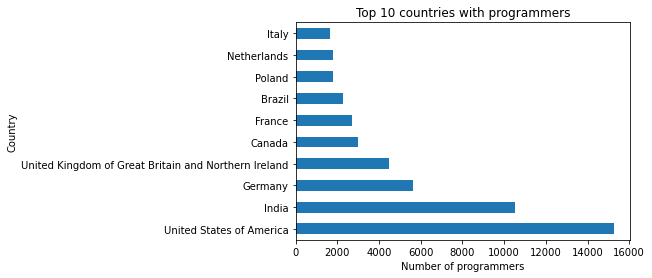

In [45]:
# plot top 10 countries with programmers

plt.title("Top 10 countries with programmers")
plt.xlabel("Number of programmers")
plt.ylabel("Country")
country_count[:10].plot(kind="barh");

